In [101]:
import pandas as pd

train_df = pd.read_csv('train.tsv', sep='\t')
val_df = pd.read_csv('val.tsv', sep='\t')


In [102]:
train_df.head()

,label,statement
0,1,"Under federal law, Jared Loughner would not ha..."
1,1,Barack Obamas health care bill is nothing new....
2,1,The DREAM Act was written by members of both p...
3,1,Says new EPA water regulations would force the...
4,0,No one in American history has moved from a Ju...


In [103]:
# no null values in dataset
train_df['statement'].isnull().sum()

0

In [104]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      2800 non-null   int64 
 1   statement  2800 non-null   object
dtypes: int64(1), object(1)
memory usage: 43.9+ KB


In [105]:
val_df['statement'].isnull().sum()

0

In [106]:
print('Train real news:', train_df[train_df['label']==1].shape[0])
print('Train fake news:', train_df[train_df['label']==0].shape[0])

print('Val real news:', val_df[val_df['label']==1].shape[0])
print('Val fake news:', val_df[val_df['label']==0].shape[0])

Train real news: 1961
Train fake news: 839
Val real news: 492
Val fake news: 208


In [107]:
#sample real news
train_df[train_df['label']==1].sample(n=1)['statement'].iloc[0]

'Republican state lawmakers are refusing to give the people of their own states their own tax dollars back in the form of (expanded) Medicaid.'

In [108]:
#sample fake news
train_df[train_df['label']==0].sample(n=1)['statement'].iloc[0]

'An anonymous e-mail says that Hillary Clinton advocates communism.'

In [109]:
# word count in news
word_counts_train = train_df['statement'].apply(lambda x: len(x.split()))


In [110]:
word_counts_train.head()

0    21
1    18
2    41
3    22
4    24
Name: statement, dtype: int64

In [111]:
word_counts_train.describe()

count    2800.000000
mean       17.896429
std         7.658950
min         3.000000
25%        12.000000
50%        17.000000
75%        22.000000
max        65.000000
Name: statement, dtype: float64

In [112]:
word_counts_val = val_df['statement'].apply(lambda x: len(x.split()))
word_counts_val.describe()

count    700.000000
mean      18.408571
std        7.679856
min        4.000000
25%       13.000000
50%       17.000000
75%       24.000000
max       53.000000
Name: statement, dtype: float64

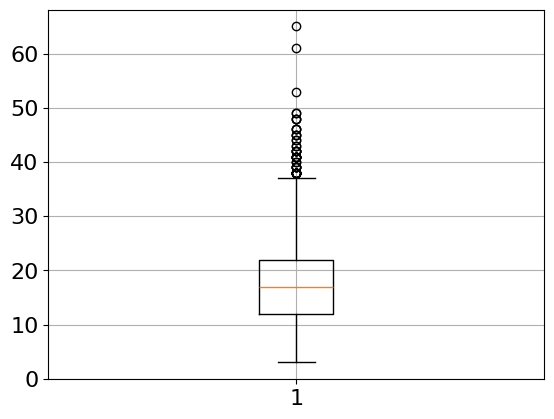

In [113]:
import matplotlib.pyplot as plt

plt.boxplot(word_counts_train)
plt.grid(True)
plt.show()

In [114]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mdash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mdash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [115]:
stop_words = stopwords.words('english')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()

In [116]:
def data_preprocessing(review):
    
    # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) # remove html tags
    review = re.sub('[^A-Za-z0-9]+', ' ', review) # taking only words
    
    # lowercase # Convert the text to lowercase
    review = review.lower()
    
    # tokenization # Tokenize the text into individual words
    tokens = nltk.word_tokenize(review)
    
    # stop word removal # Remove common English stopwords
    review = [word for word in tokens if word not in stop_words]
    
    # lemmatization # Lemmatize the words to their base form

    review = [lemmatizer.lemmatize(word) for word in review]
    
    # join words in preprocessed review
    review = ' '.join(review)
    
    return review

In [117]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mdash\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [118]:
train_df['preprocessed_title'] = train_df['statement'].apply(lambda review: data_preprocessing(review))
train_df

,label,statement,preprocessed_title
0,1,"Under federal law, Jared Loughner would not ha...",federal law jared loughner would not able buy ...
1,1,Barack Obamas health care bill is nothing new....,barack obamas health care bill nothing new mit...
2,1,The DREAM Act was written by members of both p...,dream act written member party came vote year ...
3,1,Says new EPA water regulations would force the...,say new epa water regulation would force state...
4,0,No one in American history has moved from a Ju...,one american history moved june 16 announcemen...
...,...,...,...
2795,1,Amajority of the men and women on this stage h...,amajority men woman stage previously publicly ...
2796,1,"Almost 100,000 people left Puerto Rico last year.",almost 100 000 people left puerto rico last year
2797,1,Weve dedicated more money from (Washington Cou...,weve dedicated money washington county transpo...
2798,0,President Obama . . . wants to mandate circumc...,president obama want mandate circumcision


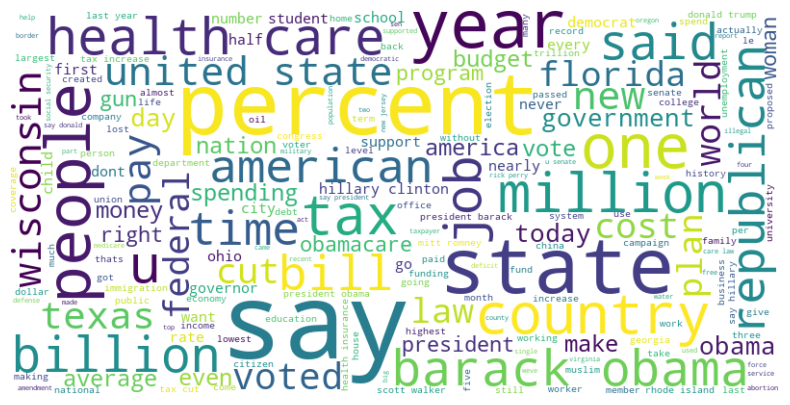

In [119]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already preprocessed the 'statement' column and created 'preprocessed_title'
# If not, replace 'preprocessed_title' with the appropriate column name

# Example DataFrame
# train_df = ...

# Combine the preprocessed titles into a single string
text = ' '.join(train_df['preprocessed_title'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Turn off axis labels
plt.show()


In [120]:
val_df['preprocessed_title'] = val_df['statement'].apply(lambda review: data_preprocessing(review))
val_df

,label,statement,preprocessed_title
0,0,Elorza wants to teach our public school childr...,elorza want teach public school child non exis...
1,1,99 percent of all new income today (is) going ...,99 percent new income today going top 1 percent
2,1,Congressman Paul introduces numerous pieces of...,congressman paul introduces numerous piece sub...
3,1,"Ive got the spending down, Ive got the debt do...",ive got spending ive got debt little bit ive g...
4,1,"Worldwide credit card transactions, the credit...",worldwide credit card transaction credit card ...
...,...,...,...
695,1,The U.S. has to go to plane graveyards and mus...,u go plane graveyard museum get part 20 year o...
696,1,"By a two-to-one margin, Rhode Islanders want t...",two one margin rhode islander want ban assault...
697,1,"Says state's expected ""increase in federal pol...",say state expected increase federal political ...
698,1,"Bill Nelson voted to confirm Sonia Sotomayor, ...",bill nelson voted confirm sonia sotomayor sign...


In [121]:
print('LIAR length:', len(val_df[val_df['label']==0]))

LIAR length: 208


In [122]:
# X_val_isot = val_df_isot['preprocessed_title']
# y_val_isot = val_df_isot['true']

# X_val_fnd = val_df['preprocessed_title']
# y_val_fnd = val_df['label']

# X_val_fnn = val_df_fnn['preprocessed_title']
# y_val_fnn = val_df_fnn['true']

# X_val_covid = val_df_covid['preprocessed_title']
# y_val_covid = val_df_covid['true']

In [123]:
train_df

,label,statement,preprocessed_title
0,1,"Under federal law, Jared Loughner would not ha...",federal law jared loughner would not able buy ...
1,1,Barack Obamas health care bill is nothing new....,barack obamas health care bill nothing new mit...
2,1,The DREAM Act was written by members of both p...,dream act written member party came vote year ...
3,1,Says new EPA water regulations would force the...,say new epa water regulation would force state...
4,0,No one in American history has moved from a Ju...,one american history moved june 16 announcemen...
...,...,...,...
2795,1,Amajority of the men and women on this stage h...,amajority men woman stage previously publicly ...
2796,1,"Almost 100,000 people left Puerto Rico last year.",almost 100 000 people left puerto rico last year
2797,1,Weve dedicated more money from (Washington Cou...,weve dedicated money washington county transpo...
2798,0,President Obama . . . wants to mandate circumc...,president obama want mandate circumcision


In [124]:
X_train = train_df['preprocessed_title']
X_val = val_df['preprocessed_title']

y_train = train_df['label']
y_val = val_df['label']
# y_test = test_df['label']

print('Train data:', X_train.shape, y_train.shape)
print('Test data:', X_val.shape, y_val.shape)
# print('Test data:', X_test.shape, y_test.shape)

Train data: (2800,) (2800,)
Test data: (700,) (700,)


In [125]:
# vectorizing text data: TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_news_tfidf = vectorizer.fit_transform(X_train)
X_val_news_tfidf = vectorizer.transform(X_val)

print('X_train_new_tfidf shape:', X_train_news_tfidf.shape)
print('X_test_news_tfidf shape:', X_val_news_tfidf.shape)

X_train_new_tfidf shape: (2800, 592)
X_test_news_tfidf shape: (700, 592)


In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Assuming you have your data loaded and preprocessed
# Replace this with your actual data loading and preprocessing steps

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['preprocessed_title'], train_df['label'], test_size=0.2, random_state=42)

# Define the pipeline with a TF-IDF vectorizer and a Logistic Regression classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression(random_state=42))
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [None, 5000, 10000, 20000],  # Adjust these values
    'lr__C': [0.1, 1, 10],  # Inverse of regularization strength
    'lr__penalty': ['l1', 'l2'],  # Regularization penalty
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation data
y_val_pred = grid_search.predict(X_val)

# Print additional metrics
print("Accuracy on Validation Set: ", accuracy_score(y_val, y_val_pred))
print("Precision on Validation Set: ", precision_score(y_val, y_val_pred))
print("Recall on Validation Set: ", recall_score(y_val, y_val_pred))
print("F1 Score on Validation Set: ", f1_score(y_val, y_val_pred))


C:\Users\mdash\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mdash\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mdash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mdash\AppData\Roaming\Python\Python311\site-

Best Parameters:  {'lr__C': 10, 'lr__penalty': 'l2', 'tfidf__max_features': None}
Best Accuracy:  0.7383928571428572
Accuracy on Validation Set:  0.7214285714285714
Precision on Validation Set:  0.7620137299771167
Recall on Validation Set:  0.8649350649350649
F1 Score on Validation Set:  0.8102189781021898


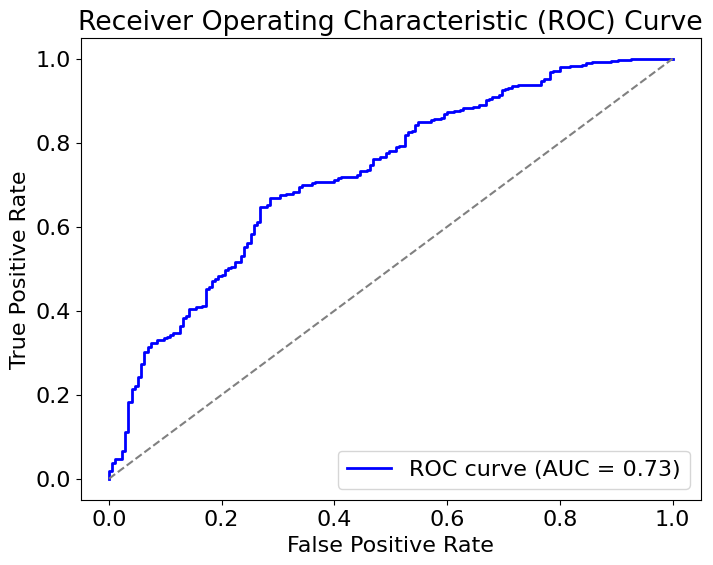

In [127]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_val_prob = grid_search.predict_proba(X_val)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)

# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_val, y_val_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [128]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_val_prob = grid_search.predict_proba(X_val)[:, 1]

# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_val, y_val_prob)

print("AUC-ROC Score: {:.2f}".format(roc_auc))


AUC-ROC Score: 0.73


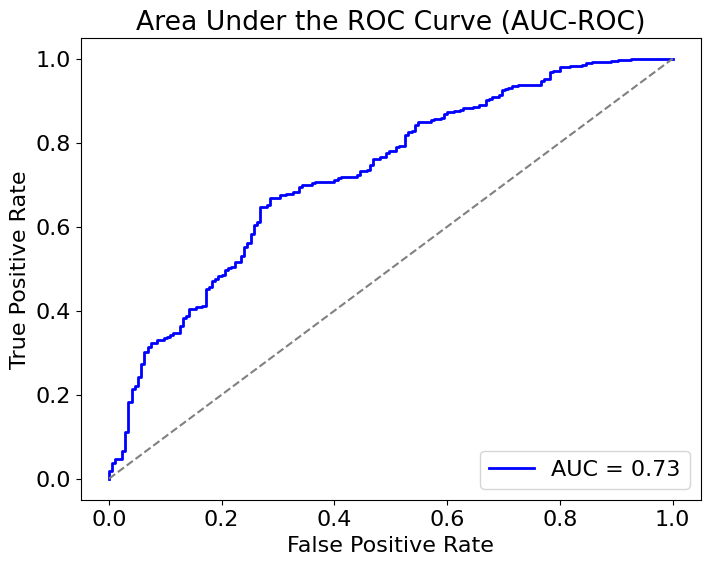

In [129]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_val_prob = grid_search.predict_proba(X_val)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)

# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_val, y_val_prob)

# Plot the AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under the ROC Curve (AUC-ROC)')
plt.legend(loc='lower right')
plt.show()


Best Parameters:  {'rf__max_depth': 10, 'rf__n_estimators': 200}
Best Accuracy:  0.89375
Accuracy on Validation Set:  0.89


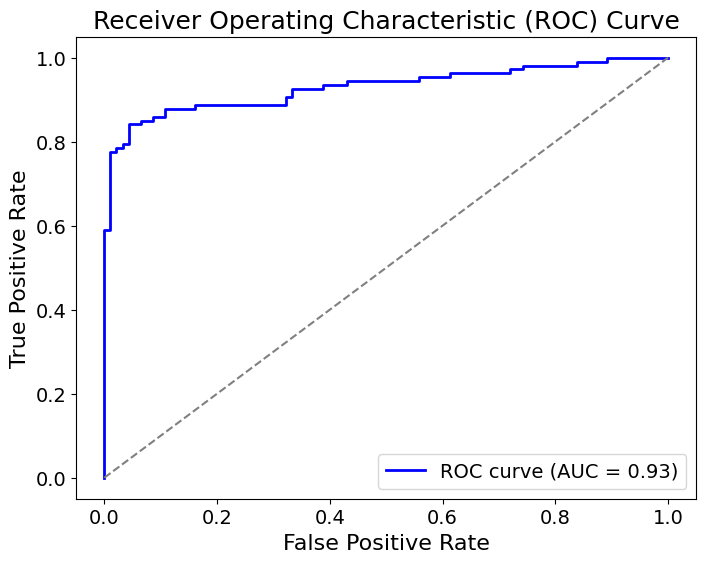

In [130]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

# Assuming X_train, y_train, X_val, y_val are already defined
# If not, you can use a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple Random Forest pipeline
pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'rf__n_estimators': [10, 50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation data
y_val_pred = grid_search.predict(X_val)

# Print additional metrics
print("Accuracy on Validation Set: ", accuracy_score(y_val, y_val_pred))

# Plot the ROC curve with custom font size
y_val_prob = grid_search.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = roc_auc_score(y_val, y_val_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set font size for labels, legend, and tick marks
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.legend(loc='lower right', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


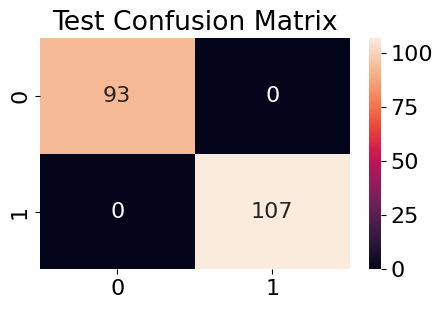

In [131]:
from sklearn.metrics import confusion_matrix #A confusion matrix is a tool used to assess the performance of a classification model by showing the counts of
import seaborn as sns                        #true positive, true negative, false positive, and false negative predictions.
from matplotlib import pyplot as plt

cm = confusion_matrix(y_val, y_val)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the Liar dataset and labels loaded into X and y
# You might need to preprocess and load your own dataset here.
X_train = train_df['preprocessed_title']
X_val = val_df['preprocessed_title']

y_train = train_df['label']
y_val = val_df['label']

# Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

nb = MultinomialNB()

alpha_values = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0]  # Values to search over

scores = []

for alpha in alpha_values:
    nb.set_params(alpha=alpha)
    nb.fit(X_train_news_tfidf, y_train)
    score = nb.score(X_train_news_tfidf, y_train)  # Evaluate on the validation set
    scores.append(score)

print(scores)


[0.7792857142857142, 0.7782142857142857, 0.775, 0.7682142857142857, 0.7514285714285714, 0.72]


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train_news_tfidf, y_train, X_val_news_tfidf, y_val are defined

# Check the dimensions of your data
print("Training data shape:", X_train_news_tfidf.shape, y_train.shape)
print("Validation data shape:", X_val_news_tfidf.shape, y_val.shape)

# Ensure consistent preprocessing between training and validation sets
# If you're using the same preprocessing for both, you can skip this step

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train_news_tfidf, y_train)

# Make predictions on the validation set
y_pred = logreg.predict(X_val_news_tfidf)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print evaluation metrics
print('Logistic Regression Classifier')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Training data shape: (2800, 592) (2800,)
Validation data shape: (700, 592) (700,)
Logistic Regression Classifier
Accuracy: 0.7342857142857143
Precision: 0.7508196721311475
Recall: 0.9308943089430894
F1 score: 0.8312159709618875


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train_news_tfidf, y_train, X_val_news_tfidf, y_val are defined

# Check the dimensions of your data
print(X_train_news_tfidf.shape, y_train.shape)

# Ensure consistent preprocessing between training and validation sets

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train_news_tfidf, y_train)

# Make predictions on the validation set
y_pred = logreg.predict(X_val_news_tfidf)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print('Logistic Regression Classifier')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


(2800, 592) (2800,)
Logistic Regression Classifier
Accuracy: 0.7342857142857143
Precision: 0.7508196721311475
Recall: 0.9308943089430894
F1 score: 0.8312159709618875


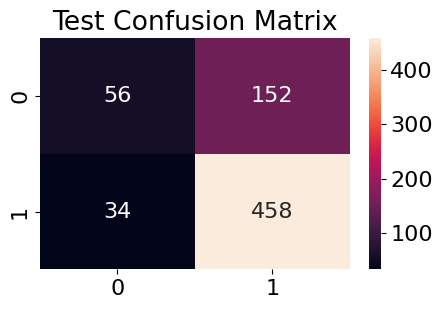

In [135]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the Liar dataset and labels loaded into X and y
# You might need to preprocess and load your own dataset here.
X_train = train_df['preprocessed_title']
X_val = val_df['preprocessed_title']

y_train = train_df['label']
y_val = val_df['label']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

logit = LogisticRegression(max_iter=10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:
    logit.set_params(C=choice)
    logit.fit(X_train_news_tfidf, y_train)
    score = logit.score(X_train_news_tfidf, y_train)  # Evaluate on the test set
    scores.append(score)
   

print(scores)



[0.7289285714285715, 0.7610714285714286, 0.7753571428571429, 0.7796428571428572, 0.7892857142857143, 0.7925, 0.8003571428571429, 0.8010714285714285]


In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create and fit the RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_news_tfidf, y_train)

# Make predictions on the validation set
y_pred = clf.predict(X_val_news_tfidf)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.72
Precision: 0.7671480144404332
Recall: 0.8638211382113821
F1 Score: 0.8126195028680688


In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline  # Add this import statement

# Assuming you have your data loaded and preprocessed
# Replace this with your actual data loading and preprocessing steps

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['preprocessed_title'], train_df['label'], test_size=0.2, random_state=42)

# Define the pipeline with a TF-IDF vectorizer and a RandomForestClassifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [None, 5000, 10000, 20000],  # Adjust these values
    'rf__n_estimators': [10, 50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation data
y_val_pred = grid_search.predict(X_val)

# Print additional metrics
print("Accuracy on Validation Set: ", accuracy_score(y_val, y_val_pred))
print("Precision on Validation Set: ", precision_score(y_val, y_val_pred))
print("Recall on Validation Set: ", recall_score(y_val, y_val_pred))
print("F1 Score on Validation Set: ", f1_score(y_val, y_val_pred))


Best Parameters:  {'rf__max_depth': None, 'rf__n_estimators': 50, 'tfidf__max_features': None}
Best Accuracy:  0.7526785714285715
Accuracy on Validation Set:  0.7071428571428572
Precision on Validation Set:  0.733615221987315
Recall on Validation Set:  0.9012987012987013
F1 Score on Validation Set:  0.8088578088578089


In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the pipeline with a TF-IDF vectorizer and a RandomForestClassifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [None, 5000, 10000, 20000],  # Adjust these values
    'rf__n_estimators': [10, 50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation data
y_val_pred = grid_search.predict(X_val)

# Print additional metrics
print("Accuracy on Validation Set: ", accuracy_score(y_val, y_val_pred))
print("Precision on Validation Set: ", precision_score(y_val, y_val_pred))
print("Recall on Validation Set: ", recall_score(y_val, y_val_pred))
print("F1 Score on Validation Set: ", f1_score(y_val, y_val_pred))


Best Parameters:  {'rf__max_depth': None, 'rf__n_estimators': 50, 'tfidf__max_features': None}
Best Accuracy:  0.7526785714285715
Accuracy on Validation Set:  0.7071428571428572
Precision on Validation Set:  0.733615221987315
Recall on Validation Set:  0.9012987012987013
F1 Score on Validation Set:  0.8088578088578089


Best Parameters:  {'rf__max_depth': 10, 'rf__n_estimators': 200}
Best Accuracy:  0.89375
Accuracy on Validation Set:  0.89


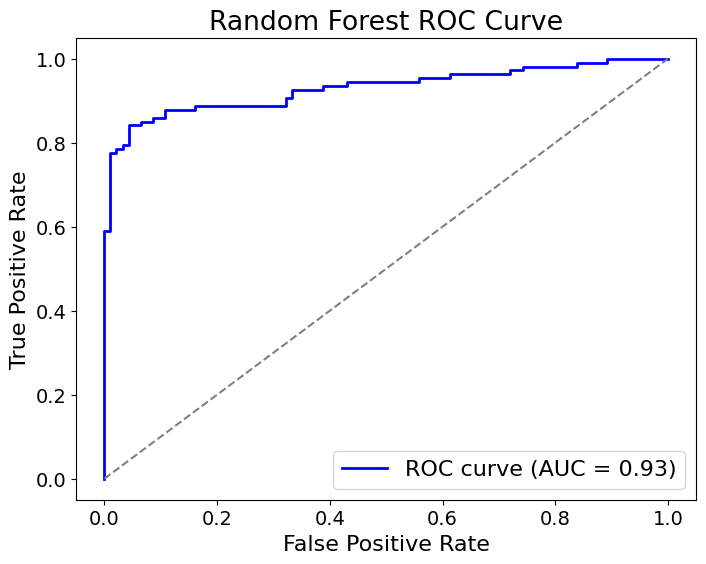

In [140]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

# Assuming X_train, y_train, X_val, y_val are already defined
# If not, you can use a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple Random Forest pipeline
pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'rf__n_estimators': [10, 50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation data
y_val_pred = grid_search.predict(X_val)

# Print additional metrics
print("Accuracy on Validation Set: ", accuracy_score(y_val, y_val_pred))

# Plot the ROC curve with custom font size
y_val_prob = grid_search.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = roc_auc_score(y_val, y_val_prob)

# Set font size for labels, legend, and tick marks explicitly
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


## Confusion Matrix


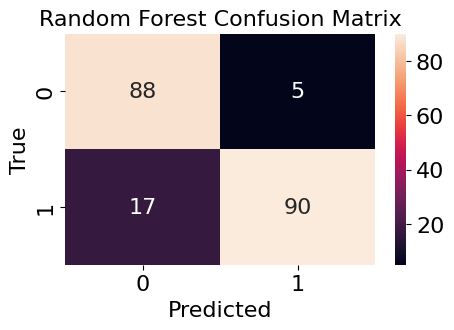

In [141]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

cm = confusion_matrix(y_val, y_val_pred)

# Set the font size for annotations
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 16})

# Set the font size for the title and axis labels
plt.title('Random Forest Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('True', fontsize=16)

plt.show()


## Model AdaBoost

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Assuming you have your data loaded and preprocessed
# Replace this with your actual data loading and preprocessing steps

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['preprocessed_title'], train_df['label'], test_size=0.2, random_state=42)

# Define the pipeline with a TF-IDF vectorizer and an AdaBoostClassifier with a DecisionTreeClassifier base estimator
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('adaboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42))
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [None, 5000, 10000, 20000],  # Adjust these values
    'adaboost__n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'adaboost__learning_rate': [0.01, 0.1, 1.0]  # Weight contribution of each classifier
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation data
y_val_pred = grid_search.predict(X_val)

# Print additional metrics
print("Accuracy on Validation Set: ", accuracy_score(y_val, y_val_pred))
print("Precision on Validation Set: ", precision_score(y_val, y_val_pred))
print("Recall on Validation Set: ", recall_score(y_val, y_val_pred))
print("F1 Score on Validation Set: ", f1_score(y_val, y_val_pred))


C:\Users\mdash\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters:  {'adaboost__learning_rate': 0.01, 'adaboost__n_estimators': 50, 'tfidf__max_features': None}
Best Accuracy:  0.671875
Accuracy on Validation Set:  0.6214285714285714
Precision on Validation Set:  0.7201017811704835
Recall on Validation Set:  0.7350649350649351
F1 Score on Validation Set:  0.7275064267352185


## GridSearch CV

In [143]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline

# # Assuming you have your data loaded and preprocessed
# # Replace this with your actual data loading and preprocessing steps

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(train_df['preprocessed_title'], train_df['label'], test_size=0.2, random_state=42)

# # Define the pipeline with a TF-IDF vectorizer, a Decision Tree classifier, and AdaBoost
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),
#     ('dt', DecisionTreeClassifier(random_state=42)),
#     ('adaboost', AdaBoostClassifier(random_state=42))
# ])

# # Define the hyperparameter grid for GridSearchCV
# param_grid = {
#     'tfidf__max_features': [None, 5000, 10000, 20000],  # Adjust these values
#     'dt__max_depth': [None, 10, 20, 30],  # Decision Tree max depth
#     'adaboost__n_estimators': [50, 100, 200],  # Number of boosting stages to be run
#     'adaboost__learning_rate': [0.01, 0.1, 1.0]  # Weight contribution of each classifier
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and corresponding accuracy
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Accuracy: ", grid_search.best_score_)

# # Evaluate the best model on the validation data
# y_val_pred = grid_search.predict(X_val)

# # Print additional metrics
# print("Accuracy on Validation Set: ", accuracy_score(y_val, y_val_pred))
# print("Precision on Validation Set: ", precision_score(y_val, y_val_pred))
# print("Recall on Validation Set: ", recall_score(y_val, y_val_pred))
# print("F1 Score on Validation Set: ", f1_score(y_val, y_val_pred))


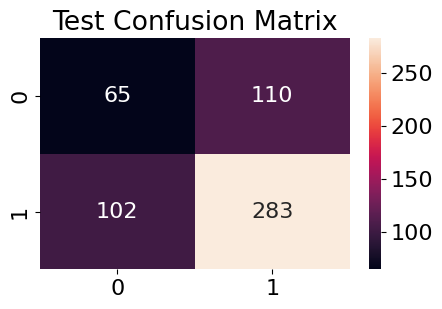

In [144]:
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

## Model KNN

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Assuming you have your data loaded and preprocessed
# Replace this with your actual data loading and preprocessing steps

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['preprocessed_title'], train_df['label'], test_size=0.2, random_state=42)

# Define the pipeline with a TF-IDF vectorizer and a k-Nearest Neighbors classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [None, 5000, 10000, 20000],  # Adjust these values
    'knn__n_neighbors': [3, 5, 7, 10],  # Number of neighbors to use
    'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'knn__p': [1, 2]  # Power parameter for Minkowski distance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation data
y_val_pred = grid_search.predict(X_val)

# Print additional metrics
print("Accuracy on Validation Set: ", accuracy_score(y_val, y_val_pred))
print("Precision on Validation Set: ", precision_score(y_val, y_val_pred))
print("Recall on Validation Set: ", recall_score(y_val, y_val_pred))
print("F1 Score on Validation Set: ", f1_score(y_val, y_val_pred))


Best Parameters:  {'knn__n_neighbors': 10, 'knn__p': 2, 'knn__weights': 'distance', 'tfidf__max_features': None}
Best Accuracy:  0.7294642857142857
Accuracy on Validation Set:  0.7196428571428571
Precision on Validation Set:  0.7375
Recall on Validation Set:  0.9194805194805195
F1 Score on Validation Set:  0.8184971098265896


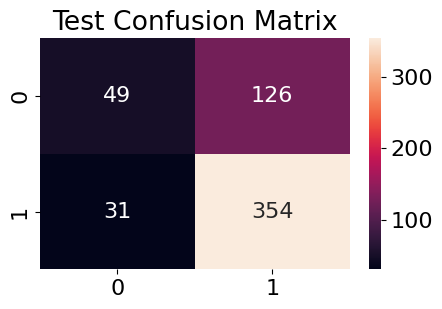

In [146]:
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

## Model XG Boost

In [147]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Assuming you have your data loaded and preprocessed
# Replace this with your actual data loading and preprocessing steps

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['preprocessed_title'], train_df['label'], test_size=0.2, random_state=42)

# Define the pipeline with a TF-IDF vectorizer and an XGBoost classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('xgb', XGBClassifier(random_state=42))
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [None, 5000, 10000, 20000],  # Adjust these values
    'xgb__n_estimators': [50, 100, 200],  # Number of boosting rounds
    'xgb__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'xgb__max_depth': [3, 5, 7]  # Maximum depth of a tree
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation data
y_val_pred = grid_search.predict(X_val)

# Print additional metrics
print("Accuracy on Validation Set: ", accuracy_score(y_val, y_val_pred))
print("Precision on Validation Set: ", precision_score(y_val, y_val_pred))
print("Recall on Validation Set: ", recall_score(y_val, y_val_pred))
print("F1 Score on Validation Set: ", f1_score(y_val, y_val_pred))


C:\Users\mdash\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Best Parameters:  {'tfidf__max_features': None, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}
Best Accuracy:  0.7375
Accuracy on Validation Set:  0.7035714285714286
Precision on Validation Set:  0.7212121212121212
Recall on Validation Set:  0.9272727272727272
F1 Score on Validation Set:  0.8113636363636364


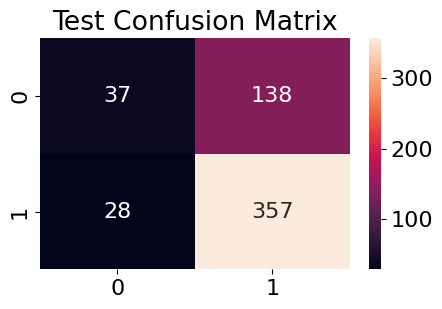

In [148]:
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

## Model SVM

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Assuming you have your data loaded and preprocessed
# Replace this with your actual data loading and preprocessing steps

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['preprocessed_title'], train_df['label'], test_size=0.2, random_state=42)

# Define the pipeline with a TF-IDF vectorizer and a Naive Bayes classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [None, 5000, 10000, 20000],  # Adjust these values
    'nb__alpha': [0.1, 0.5, 1.0, 1.5]  # Smoothing parameter for MultinomialNB
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation data
y_val_pred = grid_search.predict(X_val)

# Print additional metrics
print("Accuracy on Validation Set: ", accuracy_score(y_val, y_val_pred))
print("Precision on Validation Set: ", precision_score(y_val, y_val_pred))
print("Recall on Validation Set: ", recall_score(y_val, y_val_pred))
print("F1 Score on Validation Set: ", f1_score(y_val, y_val_pred))


Best Parameters:  {'nb__alpha': 0.5, 'tfidf__max_features': None}
Best Accuracy:  0.7361607142857143
Accuracy on Validation Set:  0.7017857142857142
Precision on Validation Set:  0.7064393939393939
Recall on Validation Set:  0.9688311688311688
F1 Score on Validation Set:  0.8170865279299014


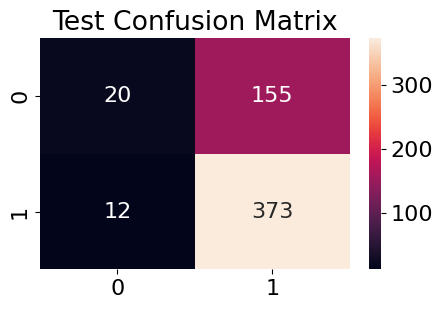

In [150]:
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Assuming you have your data loaded and preprocessed
# Replace this with your actual data loading and preprocessing steps

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['preprocessed_title'], train_df['label'], test_size=0.2, random_state=42)

# Define the pipeline with a TF-IDF vectorizer and an SVM classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(random_state=42))
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [None, 5000, 10000, 20000],  # Adjust these values
    'svm__C': [0.1, 1, 10],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf'],  # Kernel type
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation data
y_val_pred = grid_search.predict(X_val)

# Print additional metrics
print("Accuracy on Validation Set: ", accuracy_score(y_val, y_val_pred))
print("Precision on Validation Set: ", precision_score(y_val, y_val_pred))
print("Recall on Validation Set: ", recall_score(y_val, y_val_pred))
print("F1 Score on Validation Set: ", f1_score(y_val, y_val_pred))


Best Parameters:  {'svm__C': 10, 'svm__kernel': 'rbf', 'tfidf__max_features': None}
Best Accuracy:  0.7504464285714286
Accuracy on Validation Set:  0.7357142857142858
Precision on Validation Set:  0.7484276729559748
Recall on Validation Set:  0.9272727272727272
F1 Score on Validation Set:  0.82830626450116


In [152]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Create and fit the Support Vector Machine (SVM) classifier
# clf = svm.SVC()
# clf.fit(X_train_news_tfidf, y_train)

# # Make predictions on the validation set
# y_pred = clf.predict(X_val_news_tfidf)

# # Calculate accuracy, precision, recall, and F1 score
# accuracy = accuracy_score(y_val, y_pred)
# precision = precision_score(y_val, y_pred)
# recall = recall_score(y_val, y_pred)
# f1 = f1_score(y_val, y_pred)

# # Print the results
# print('Accuracy:', accuracy)
# print('Precision:', precision)
# print('Recall:', recall)
# print('F1 Score:', f1)


## Model Naive Bayes

In [153]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# from skopt import BayesSearchCV

# # Define the Naive Bayes model training and evaluation function
# def evaluate_naive_bayes(params):
#     alpha = params['alpha']
#     clf = MultinomialNB(alpha=alpha)
#     clf.fit(X_train_news_tfidf, y_train)

#     # Predictions on the validation set
#     y_pred = clf.predict(X_val_news_tfidf)

#     # Calculate evaluation metrics
#     accuracy = accuracy_score(y_val, y_pred)
#     precision = precision_score(y_val, y_pred)
#     recall = recall_score(y_val, y_pred)
#     f1 = f1_score(y_val, y_pred)

#     return -f1  # Note that we return -f1 because scikit-optimize maximizes, and we want to maximize F1.

# # Bayesian optimization for alpha (smoothing parameter)
# opt = BayesSearchCV(
#     MultinomialNB(),
#     {"alpha": (0.01, 1.0)},
#     n_iter=10,
#     random_state=42,
#     verbose=2,
#     scoring="f1",
#     n_jobs=-1
# )

# opt.fit(X_train_news_tfidf, y_train)

# # Get the best hyperparameters
# best_alpha = opt.best_params_["alpha"]

# # Train the final model with the best hyperparameters
# clf = MultinomialNB(alpha=best_alpha)
# clf.fit(X_train_news_tfidf, y_train)

# # Predictions on the validation set
# y_pred = clf.predict(X_val_news_tfidf)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_val, y_pred)
# precision = precision_score(y_val, y_pred)
# recall = recall_score(y_val, y_pred)
# f1 = f1_score(y_val, y_pred)

# # Plot the confusion matrix
# cm = confusion_matrix(y_val, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

# # Print evaluation metrics
# print('Best alpha:', best_alpha)
# print('Accuracy:', accuracy)
# print('Precision:', precision)
# print('Recall:', recall)
# print('F1-Score:', f1)


In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Assuming you have your data loaded and preprocessed
# Replace this with your actual data loading and preprocessing steps

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['preprocessed_title'], train_df['label'], test_size=0.2, random_state=42)

# Define the pipeline with a TF-IDF vectorizer and a Multinomial Naive Bayes classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [None, 5000, 10000, 20000],  # Adjust these values
    'nb__alpha': [0.1, 0.5, 1.0, 2.0],  # Additive (Laplace/Lidstone) smoothing parameter
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation data
y_val_pred = grid_search.predict(X_val)

# Print additional metrics
print("Accuracy on Validation Set: ", accuracy_score(y_val, y_val_pred))
print("Precision on Validation Set: ", precision_score(y_val, y_val_pred))
print("Recall on Validation Set: ", recall_score(y_val, y_val_pred))
print("F1 Score on Validation Set: ", f1_score(y_val, y_val_pred))


Best Parameters:  {'nb__alpha': 0.5, 'tfidf__max_features': None}
Best Accuracy:  0.7361607142857143
Accuracy on Validation Set:  0.7017857142857142
Precision on Validation Set:  0.7064393939393939
Recall on Validation Set:  0.9688311688311688
F1 Score on Validation Set:  0.8170865279299014


In [155]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# from bayes_opt import BayesianOptimization



# # Define the RandomForestClassifier model training and evaluation function
# def evaluate_random_forest(n_estimators, max_depth, min_samples_split, min_samples_leaf):
#     clf = RandomForestClassifier(
#         n_estimators=int(n_estimators),
#         max_depth=int(max_depth),
#         min_samples_split=int(min_samples_split),
#         min_samples_leaf=int(min_samples_leaf),
#         random_state=42,
#     )

#     clf.fit(X_train_news_tfidf, y_train)

#     # Predictions on the validation set
#     y_pred = clf.predict(X_val_news_tfidf)

#     # Calculate evaluation metrics
#     accuracy = accuracy_score(y_val, y_pred)
#     precision = precision_score(y_val, y_pred)
#     recall = recall_score(y_val, y_pred)
#     f1 = f1_score(y_val, y_pred)

#     return f1

# # Bayesian optimization for RandomForestClassifier hyperparameters
# pbounds = {'n_estimators': (10, 200),
#            'max_depth': (5, 50),
#            'min_samples_split': (2, 20),
#            'min_samples_leaf': (1, 10)}

# optimizer = BayesianOptimization(
#     f=evaluate_random_forest,
#     pbounds=pbounds,
#     verbose=2,
#     random_state=42,
# )

# optimizer.maximize(init_points=5, n_iter=10)

# # Get the best hyperparameters
# best_params = optimizer.max['params']

# # Train the final model with the best hyperparameters
# clf = RandomForestClassifier(
#     n_estimators=int(best_params['n_estimators']),
#     max_depth=int(best_params['max_depth']),
#     min_samples_split=int(best_params['min_samples_split']),
#     min_samples_leaf=int(best_params['min_samples_leaf']),
#     random_state=42,
# )

# clf.fit(X_train_news_tfidf, y_train)

# # Predictions on the validation set
# y_pred = clf.predict(X_val_news_tfidf)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_val, y_pred)
# precision = precision_score(y_val, y_pred)
# recall = recall_score(y_val, y_pred)
# f1 = f1_score(y_val, y_pred)

# # Plot the confusion matrix
# cm = confusion_matrix(y_val, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

# # Print evaluation metrics
# print('Best hyperparameters:', best_params)
# print('Accuracy:', accuracy)
# print('Precision:', precision)
# print('Recall:', recall)
# print('F1-Score:', f1)

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Assuming you have your data loaded and preprocessed
# Replace this with your actual data loading and preprocessing steps

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['preprocessed_title'], train_df['label'], test_size=0.2, random_state=42)

# Define the pipeline with a TF-IDF vectorizer and a RandomForestClassifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [None, 5000, 10000, 20000],  # Adjust these values
    'rf__n_estimators': [10, 50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation data
y_val_pred = grid_search.predict(X_val)

# Print additional metrics
print("Accuracy on Validation Set: ", accuracy_score(y_val, y_val_pred))
print("Precision on Validation Set: ", precision_score(y_val, y_val_pred))
print("Recall on Validation Set: ", recall_score(y_val, y_val_pred))
print("F1 Score on Validation Set: ", f1_score(y_val, y_val_pred))


Best Parameters:  {'rf__max_depth': None, 'rf__n_estimators': 50, 'tfidf__max_features': None}
Best Accuracy:  0.7526785714285715
Accuracy on Validation Set:  0.7071428571428572
Precision on Validation Set:  0.733615221987315
Recall on Validation Set:  0.9012987012987013
F1 Score on Validation Set:  0.8088578088578089


In [157]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# from sklearn.model_selection import cross_val_score
# from bayes_opt import BayesianOptimization




# # Define the AdaBoostClassifier model training and evaluation function
# def evaluate_adaboost(n_estimators, learning_rate):
#     clf = AdaBoostClassifier(
#         n_estimators=int(n_estimators),
#         learning_rate=learning_rate,
#         random_state=42,
#     )

#     clf.fit(X_train_news_tfidf, y_train)

#     # Predictions on the validation set
#     y_pred = clf.predict(X_val_news_tfidf)

#     # Calculate evaluation metrics
#     accuracy = accuracy_score(y_val, y_pred)
#     precision = precision_score(y_val, y_pred)
#     recall = recall_score(y_val, y_pred)
#     f1 = f1_score(y_val, y_pred)

#     return f1

# # Bayesian optimization for AdaBoostClassifier hyperparameters
# pbounds = {'n_estimators': (10, 200),
#            'learning_rate': (0.01, 1.0)}

# optimizer = BayesianOptimization(
#     f=evaluate_adaboost,
#     pbounds=pbounds,
#     verbose=2,
#     random_state=42,
# )

# optimizer.maximize(init_points=5, n_iter=10)

# # Get the best hyperparameters
# best_params = optimizer.max['params']

# # Train the final model with the best hyperparameters
# clf = AdaBoostClassifier(
#     n_estimators=int(best_params['n_estimators']),
#     learning_rate=best_params['learning_rate'],
#     random_state=42,
# )

# clf.fit(X_train_news_tfidf, y_train)

# # Predictions on the validation set
# y_pred = clf.predict(X_val_news_tfidf)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_val, y_pred)
# precision = precision_score(y_val, y_pred)
# recall = recall_score(y_val, y_pred)
# f1 = f1_score(y_val, y_pred)

# # Plot the confusion matrix
# cm = confusion_matrix(y_val, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

# # Print evaluation metrics
# print('Best hyperparameters:', best_params)
# print('Accuracy:', accuracy)
# print('Precision:', precision)
# print('Recall:', recall)
# print('F1-Score:', f1)

In [158]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from bayes_opt import BayesianOptimization

# Define the SVM model training and evaluation function
def evaluate_svm(C, gamma):
    clf = SVC(C=C, gamma=gamma)
    clf.fit(X_train_news_tfidf, y_train)

    # Predictions on the validation set
    y_pred = clf.predict(X_val_news_tfidf)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    return f1

# Bayesian optimization for SVM hyperparameters
pbounds_svm = {'C': (0.01, 10),
               'gamma': (0.01, 1.0)}

optimizer_svm = BayesianOptimization(
    f=evaluate_svm,
    pbounds=pbounds_svm,
    verbose=2,
    random_state=42,
)

optimizer_svm.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_params_svm = optimizer_svm.max['params']

# Train the final model with the best hyperparameters
clf_svm = SVC(C=best_params_svm['C'], gamma=best_params_svm['gamma'])
clf_svm.fit(X_train_news_tfidf, y_train)

# Predictions on the validation set
y_pred_svm = clf_svm.predict(X_val_news_tfidf)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_val, y_pred_svm)
precision_svm = precision_score(y_val, y_pred_svm)
recall_svm = recall_score(y_val, y_pred_svm)
f1_svm = f1_score(y_val, y_pred_svm)

# Plot the confusion matrix for SVM
cm_svm = confusion_matrix(y_val, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

# Print evaluation metrics for SVM
print('Best hyperparameters for SVM:', best_params_svm)
print('Accuracy for SVM:', accuracy_svm)
print('Precision for SVM:', precision_svm)
print('Recall for SVM:', recall_svm)
print('F1-Score for SVM:', f1_svm)


|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------


ValueError: Found input variables with inconsistent numbers of samples: [2800, 2240]